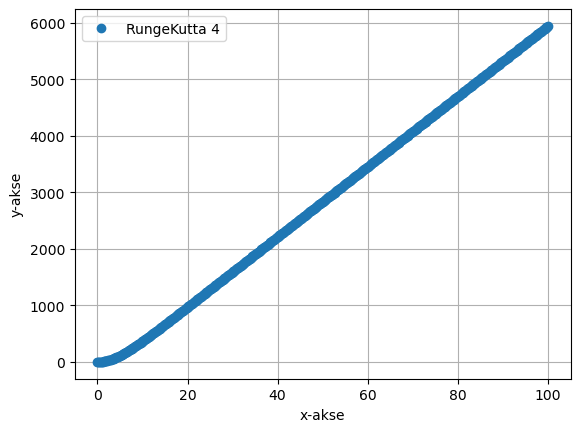

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This solves example 7.4, page 257 in Numerical Methods in Engineering with Python 3
# Here we use the flexible framework provided in the book.
# Here both the 4th order Runge Kutta and the first order Euler method are included.
# Again, note that if one want to change to another problem
# one need to adjust x, xstop, y (initial conditions), h1,h2 and the F function.
# But the functions integrate_euler, integrate_rung4, run_kut 4 are generic.



def main():
    x=0.0  # Start of integration
    xStop=100.0  # End of integration
    y=np.array([0.0,0.0])  #Initial conditions
    #h1=0.05  # Step size
    h2=0.2
    #X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h2)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    #plt.plot(X1,Y1[:,0],X2,Y2[:,0],'o',X2,YEx)
    plt.plot(X2,Y2[:,0],'o')
    plt.legend(['RungeKutta 4'])
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
    
def integrate_euler(F,x,y,xStop,h):
    
    # a general function that applies Eulers method
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def integrate_rungk4(F,x,y,xStop,h):
    
    # a general function that applies rungekutta
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)


def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    F=np.zeros(2)
    F[0]=y[1]
    F[1]=9.81 - (0.2028/80.0)*y[1]**2
    return F
    

main()    
